In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time

from sys import path
path.append(r'E:\data_mining\project\IJCAI-17-口碑\koubei')

import predict
import base
import shop_classify as sc

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [9]:
#'learning_rate':[0.03, 0.05, 0.07], 
tuned_parameters = {'n_estimators': [50, 60, 70], 'min_samples_split': [7, 10, 13], 'min_samples_leaf': [5, 7, 9], 'max_depth': [3,4,5]}


rf = RandomForestClassifier(random_state=0)

clf = GridSearchCV(rf, tuned_parameters, cv=4, scoring='recall')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

NameError: name 'X_train' is not defined

In [4]:
mean_3_3_3_prediction = pd.read_csv('../data/predict/mean/3_3_3_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')
blend_prediction = pd.read_csv('../data/predict/classify_3/blend_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')
arima_prediction = pd.read_csv('../data/predict/arima/arima_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')

In [5]:
#读取训练集
X_train_df = pd.read_csv("../data/train/classify_3/X_train.csv", index_col=0)
y_train_df = pd.read_csv("../data/train/classify_3/y_train.csv", index_col=0)

In [6]:
today = datetime.date.today()
X_test = pd.read_csv("../data/predict/classify_3/X_test.csv", index_col=0)

In [7]:
# Split the dataset in two equal parts
X_train, X_validation, y_train, y_validation = train_test_split(X_train_df, y_train_df['type'], random_state=1, test_size=0.25)

In [8]:
#######rRF

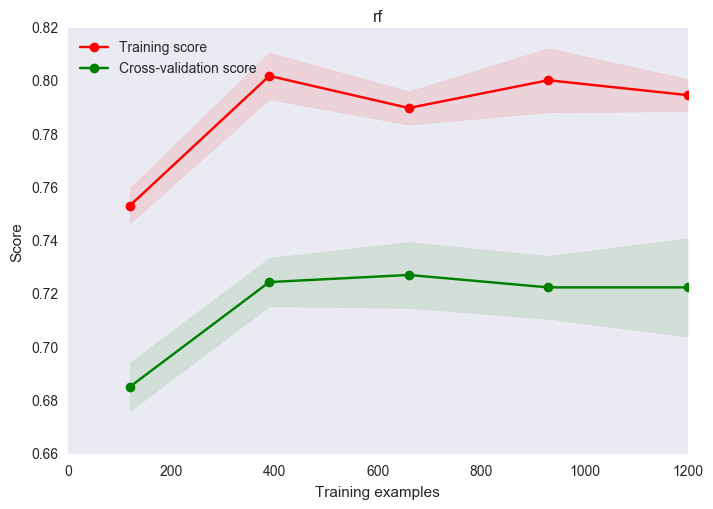

In [12]:

#An_estimators=60, max_depth=5, min_samples_split=13, min_samples_leaf=5, n_jobs=2, random_state=0, class_weight=None
rf_classifier = RandomForestClassifier(
    n_estimators=200, max_depth=6, min_samples_split=30, min_samples_leaf=15, n_jobs=2, random_state=0, class_weight=None)
plot_learning_curve(rf_classifier, 'rf', X_train, y_train, cv=5)
plt.show()

In [21]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=13, min_weight_fraction_leaf=0.0,
            n_estimators=60, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [22]:
rf_classifier.score(X_validation, y_validation)

0.76000000000000001

In [23]:
y_pred = rf_classifier.predict(X_validation)

In [24]:
metrics.precision_score(y_validation, y_pred, pos_label=0)

0.77014218009478674

In [25]:
metrics.recall_score(y_validation, y_pred, pos_label=0)

0.93390804597701149

In [26]:
metrics.precision_score(y_validation, y_pred, pos_label=1)

0.70512820512820518

In [27]:
metrics.recall_score(y_validation, y_pred, pos_label=1)

0.36184210526315791

In [28]:
y_pred_df = pd.DataFrame(y_pred, index=y_validation.index)
y_pred_df[y_pred_df[0] == 1].count()

0    78
dtype: int64

In [29]:
y_pred_df.to_csv('../data/train/classify_3/y_predict_rf.csv')

In [30]:
y_test = rf_classifier.predict(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.set_index(np.array(range(1, 2001)))

In [31]:
y_test_df[y_test_df[0] == 1].count()

0    342
dtype: int64

In [32]:
y_test_df.to_csv('../data/predict/classify_3/y_test_rf.csv')

In [57]:
manual_y_test_df = y_test_df

In [55]:
manual_mean_arr = [810, 1016, 1086, 1543, 1749]

In [56]:
manual_arima_arr = [23, 75, 81, 96, 599, 603, 625, 632, 633, 641, 680, 684, 685, 693, 708, 733, 742, 750, 768, 826, 835, 
                    841, 908, 912, 921, 1047, 1054, 1060, 1097, 1099, 1122, 1136, 1145, 1154, 1179, 1350, 1240, 1295, 1307, 
                    1319, 1463, 1526, 1545, 1552, 1556, 1569, 1587, 1632, 1636, 1659, 1808, 1857, 1870, 1896, 1918, 
                    1925, 1933, 1973, 1982]

In [62]:
manual_y_test.loc[manual_mean_arr] = 0
manual_y_test.loc[manual_arima_arr] = 2

In [61]:
manual_y_test.loc[1543]

0    0
Name: 1543, dtype: int64

In [65]:
combine_prediction = {}
for id in range(1, 2001):
    if y_test_df.loc[id].values == 0:
        combine_prediction[id] = mean_3_3_3_prediction.loc[id].values;
    elif y_test_df.loc[id].values == 1:
        combine_prediction[id] = blend_prediction.loc[id].values;
    elif y_test_df.loc[id].values == 2:
        combine_prediction[id] = arima_prediction.loc[id].values;
        
combine_prediction = pd.DataFrame.from_dict(combine_prediction, orient='index')

In [33]:
combine_prediction = {}
for id in range(1, 2001):
    if y_test_df.loc[id].values == 0:
        combine_prediction[id] = mean_3_3_3_prediction.loc[id].values;
    else:
        print(id)
        combine_prediction[id] = blend_prediction.loc[id].values;
        
combine_prediction = pd.DataFrame.from_dict(combine_prediction, orient='index')

2
22
23
55
64
68
75
76
78
81
96
99
103
109
123
125
126
130
131
143
150
155
167
170
178
184
185
190
203
216
219
222
230
232
236
237
238
254
257
259
265
267
270
274
276
281
290
308
319
326
327
329
340
343
347
354
357
363
364
374
381
384
387
393
394
407
411
419
420
422
428
436
440
445
454
461
465
469
474
483
484
487
488
489
490
492
498
501
510
512
520
540
549
550
556
573
581
586
589
599
603
625
626
627
632
633
635
636
641
643
659
660
661
669
680
683
684
685
687
690
693
698
700
706
707
708
718
733
735
739
741
742
750
758
759
761
763
768
774
784
794
807
810
811
813
821
823
826
828
832
835
841
845
861
878
880
891
908
912
920
921
927
930
947
956
963
969
983
993
996
1003
1010
1016
1024
1039
1040
1046
1047
1048
1050
1053
1054
1058
1060
1064
1070
1075
1078
1079
1080
1086
1091
1096
1097
1099
1103
1105
1106
1111
1120
1122
1125
1132
1136
1137
1138
1144
1145
1154
1169
1179
1192
1194
1198
1200
1206
1232
1237
1239
1240
1243
1259
1260
1262
1269
1282
1290
1295
1300
1305
1307
1319
1330
1333
1334
1336
134

In [66]:
combine_prediction = predict.FixFinalPredict(combine_prediction)

In [67]:
combine_prediction.to_csv('../data/predict/classify_3/prediction_rf_342_0_75_A_M' + today.isoformat() + '.csv', index=True, header=None, encoding='UTF-8')

In [ ]:
#######GBDT

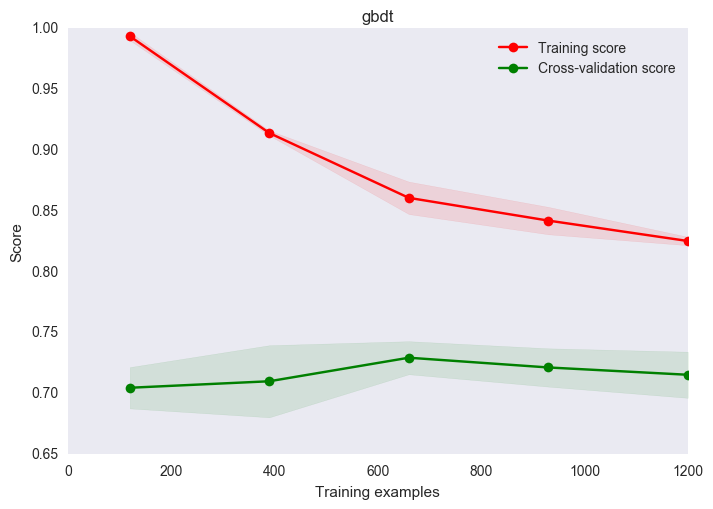

In [36]:
#A(random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=40) 0.0847
#B(random_state=0, min_samples_split=25, max_depth=4, learning_rate=0.07, min_samples_leaf=6, n_estimators=20)0.0841
#C(random_state=0, min_samples_split=13, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=60)
learning_gbdt = GradientBoostingClassifier(random_state=0, min_samples_split=20, max_depth=3, learning_rate=0.07, min_samples_leaf=6, n_estimators=50)
plot_learning_curve(learning_gbdt, 'gbdt', X_train, y_train, cv=5)
plt.show()

In [37]:
learning_gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.07, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=6,
              min_samples_split=20, min_weight_fraction_leaf=0.0,
              n_estimators=50, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [38]:
learning_gbdt.score(X_validation, y_validation)

0.752

In [39]:
metrics.precision_score(y_validation, y_pred, pos_label=0)

0.77014218009478674

In [40]:
metrics.recall_score(y_validation, y_pred, pos_label=0)

0.93390804597701149

In [41]:
metrics.precision_score(y_validation, y_pred, pos_label=1)

0.70512820512820518

In [42]:
metrics.recall_score(y_validation, y_pred, pos_label=1)

0.36184210526315791

In [43]:
y_pred = learning_gbdt.predict(X_validation)

In [44]:
y_pred_df = pd.DataFrame(y_pred, index=y_validation.index)
y_pred_df[y_pred_df[0] == 1].count()

0    90
dtype: int64

In [45]:
y_pred_df.to_csv('../data/train/classify_3/y_predict_gbdt.csv')

In [46]:
X_test = pd.read_csv("../data/predict/classify_3/X_test.csv", index_col=0)

In [47]:
y_test = learning_gbdt.predict(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df = y_test_df.set_index(np.array(range(1, 2001)))

In [48]:
y_test_df[y_test_df[0] == 1].count()

0    580
dtype: int64

In [49]:
y_test_df.to_csv('../data/predict/classify_3/y_test_580.csv')

In [169]:
arima_arr = [742,825,286,272,1350,1296,1145,1998,1881,1469,1556,407,501,1631,1269,428,308,88,275,1925,23,1462,5,768,489,1526,1765,1591,1229,1825,1295,1060]

In [171]:
# combine_prediction = {}
# for id in range(1, 2001):
#     if id in arima_arr:
#         combine_prediction[id] = arima_prediction.loc[id].values;
#     else:
#         combine_prediction[id] = mean_3_3_3_prediction.loc[id].values;
        
# combine_prediction = pd.DataFrame.from_dict(combine_prediction, orient='index')

In [50]:
combine_prediction = {}
for id in range(1, 2001):
    if y_test_df.loc[id].values == 0:
        combine_prediction[id] = mean_3_3_3_prediction.loc[id].values;
    else:
        print(id)
        combine_prediction[id] = blend_prediction.loc[id].values;
        
combine_prediction = pd.DataFrame.from_dict(combine_prediction, orient='index')

2
5
14
18
20
22
23
24
28
31
40
43
60
64
66
68
71
76
78
81
96
99
103
106
108
109
111
123
126
130
131
136
150
155
157
158
163
167
168
170
172
178
184
185
190
201
205
216
219
221
225
228
230
232
236
237
238
241
242
252
254
257
258
259
260
261
265
267
268
272
274
276
278
280
281
286
302
308
317
319
320
322
323
332
339
340
341
343
349
354
357
362
363
364
367
372
374
376
381
383
384
385
387
390
393
396
400
407
419
420
422
425
428
430
439
440
445
446
450
454
461
463
465
469
471
474
477
478
480
481
483
484
488
489
491
492
494
496
498
499
501
510
514
515
516
526
535
540
541
543
544
556
558
561
563
573
576
584
586
587
589
590
596
597
599
606
609
612
623
625
626
627
632
633
634
635
636
641
643
644
646
651
653
659
661
666
667
669
673
680
683
684
685
687
689
690
692
693
698
700
706
707
708
713
718
720
724
726
727
733
739
741
742
750
754
756
758
761
763
764
768
770
774
780
784
790
792
796
807
808
810
813
815
817
820
821
822
823
825
826
828
832
833
835
838
841
842
845
851
855
856
857
861
863
880
889


In [51]:
combine_prediction = predict.FixFinalPredict(combine_prediction)

In [52]:
combine_prediction.to_csv('../data/predict/classify_3/prediction_gbdt_580_C_' + today.isoformat() + '.csv', index=True, header=None, encoding='UTF-8')